---
title: "Deep Learning Concepts"
description: "A simple intro to deep learning from scratch, and using Pytorch."
date: 2025-08-19
categories: [machine-learning, tutorials, deep-learning]
---

## 1. The Perceptron: A Single Linear Neuron

The Perceptron is the simplest form of a neural network. It's a single neuron that takes binary inputs, applies weights and a bias, and uses a step function to produce a binary output. It can only solve **linearly separable** problems.

The formula is: $y = f(\sum_{i} w_i x_i + b)$, where $f$ is a step function.

$f(x) = \begin{cases} 1 & \text{if } x \geq 0 \\ 0 & \text{if } x < 0 \end{cases}$

In [33]:
import matplotlib.pyplot as plt 

In [34]:
import numpy as np

class Perceptron:
    """A simple Perceptron classifier."""
    def __init__(self, learning_rate=0.1, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._step_function
        self.weights = None
        self.bias = None

    def _step_function(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        print('Beginning to fit')
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

            if i%10==0:
                print(i)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)

    def show(self):
        fig, ax = plt.subplots(figsize=(4, 2))
        ax.axis('off')

        # Input layer (2 inputs)
        ax.add_patch(plt.Circle((0.5, 1), 0.1, color='skyblue', ec='black'))
        ax.text(0.3, 1, "$x_1$", fontsize=12)
        ax.add_patch(plt.Circle((0.5, 0.5), 0.1, color='skyblue', ec='black'))
        ax.text(0.3, 0.5, "$x_2$", fontsize=12)

        # Output neuron
        ax.add_patch(plt.Circle((2, 0.75), 0.12, color='salmon', ec='black'))
        ax.text(2.2, 0.75, "$\hat{y}$", fontsize=12)

        # Arrows
        ax.annotate("", xy=(1.88, 0.75), xytext=(0.6, 1), arrowprops=dict(arrowstyle='->'))
        ax.annotate("", xy=(1.88, 0.75), xytext=(0.6, 0.5), arrowprops=dict(arrowstyle='->'))

        ax.set_title("Perceptron Architecture", fontsize=14)
        plt.xlim(0, 2.5)
        plt.ylim(0.2, 1.3)
        plt.tight_layout()
        plt.show()

<>:51: SyntaxWarning: invalid escape sequence '\h'
<>:51: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_65160/2482501332.py:51: SyntaxWarning: invalid escape sequence '\h'
  ax.text(2.2, 0.75, "$\hat{y}$", fontsize=12)


In [35]:
model = Perceptron()

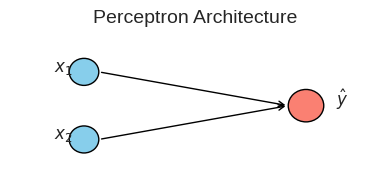

In [36]:
model.show()

Step Function: Outputs 0 for negative input, 1 for positive. Used in the original Perceptron.


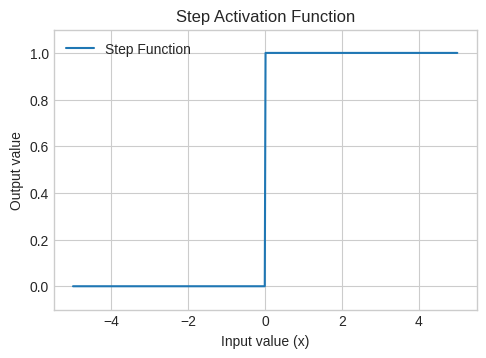

In [37]:
# Generate data 
x_vals = np.linspace(-5, 5, 500)
y_step = model._step_function(x_vals)

# Create the plot
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x_vals, y_step, label='Step Function')
plt.title('Step Activation Function')
plt.xlabel('Input value (x)')
plt.ylabel('Output value')
plt.ylim(-0.1, 1.1)
plt.legend()
print("Step Function: Outputs 0 for negative input, 1 for positive. Used in the original Perceptron.")


### Verification: Perceptron Fails for XOR Gate

The XOR (exclusive OR) gate is a classic example of a non-linearly separable problem. A single straight line cannot separate the `(0,1)` and `(1,0)` points from `(0,0)` and `(1,1)`.

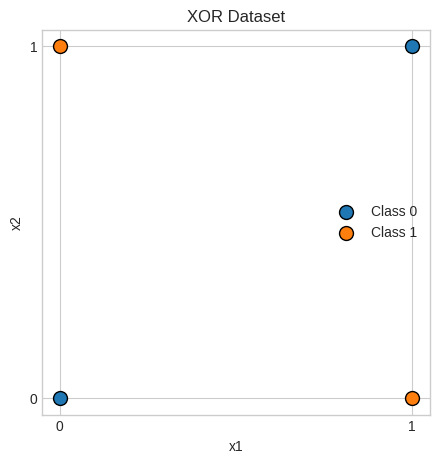

In [38]:
# XOR problem data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

plt.figure(figsize=(5, 5))
for label in np.unique(y_xor):
    plt.scatter(
        X_xor[y_xor == label, 0], 
        X_xor[y_xor == label, 1], 
        label=f"Class {label}", 
        edgecolor='k', 
        s=100
    )

plt.title("XOR Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()


In [39]:
# Train the perceptron
perceptron = Perceptron(learning_rate=0.1, n_iters=100)
perceptron.fit(X_xor, y_xor)

Beginning to fit
0
10
20
30
40
50
60
70
80
90


In [8]:
print("\n=== Perceptron Model Structure ===")
print(f"Number of layers: 1 (no hidden layer)")
print(f"Weights shape: {perceptron.weights.shape}")
print(f"Bias: {perceptron.bias}")


=== Perceptron Model Structure ===
Number of layers: 1 (no hidden layer)
Weights shape: (2,)
Bias: 0.0


In [9]:
# Get predictions
predictions = perceptron.predict(X_xor)

print(f"XOR Input:\n{X_xor}")
print(f"Expected Output: {y_xor}")
print(f"Perceptron Output: {predictions}")
accuracy = np.sum(y_xor == predictions) / len(y_xor)
print(f"Accuracy: {accuracy * 100}%")
print("\nAs you can see, the single-layer Perceptron cannot learn the XOR function.")

XOR Input:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Expected Output: [0 1 1 0]
Perceptron Output: [1 1 0 0]
Accuracy: 50.0%

As you can see, the single-layer Perceptron cannot learn the XOR function.


## 2. Multilayer Perceptron (MLP) for XOR

To solve non-linear problems like XOR, we need to add a **hidden layer**. This is a Multilayer Perceptron (MLP). The hidden layer allows the network to learn non-linear combinations of the inputs. We also switch to a smooth activation function like the Sigmoid function to enable gradient-based learning via **backpropagation**.

Mathematically, \
Sigmoid function: $\sigma(x) = \frac{1}{1 + e^{-x}}$

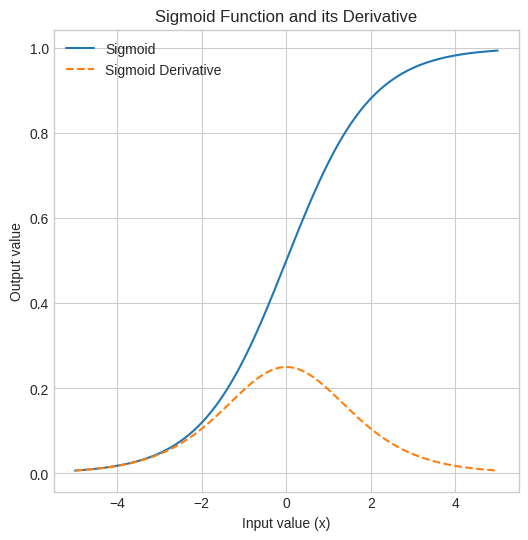

In [40]:
# Activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

y_sigmoid = sigmoid(x_vals)
y_sigmoid_deriv = sigmoid_derivative(y_sigmoid)

plt.figure(figsize=(6, 6))
plt.plot(x_vals, y_sigmoid, label='Sigmoid')
plt.plot(x_vals, y_sigmoid_deriv, label='Sigmoid Derivative', linestyle='--')
plt.title('Sigmoid Function and its Derivative')
plt.xlabel('Input value (x)')
plt.ylabel('Output value')
plt.legend()

In [11]:
def draw_mlp_architecture(input_size, hidden_size, output_size):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.axis('off')

    # Circle radius
    r = 0.1

    # Layer x-positions
    x_input = 0.5
    x_hidden = 2
    x_output = 3.5

    # Draw input layer
    for i in range(input_size):
        y = 1.5 - i * 0.75
        ax.add_patch(plt.Circle((x_input, y), r, color='skyblue', ec='black'))
        ax.text(x_input - 0.3, y, f"$x_{i+1}$", fontsize=12)

    # Draw hidden layer
    for j in range(hidden_size):
        y = 1.5 - j * 0.75
        ax.add_patch(plt.Circle((x_hidden, y), r, color='lightgreen', ec='black'))
        ax.text(x_hidden, y, f"$h_{j+1}$", fontsize=12, ha='center', va='center')

    # Draw output layer
    for k in range(output_size):
        y = 0.75  # Always one output neuron here
        ax.add_patch(plt.Circle((x_output, y), r, color='salmon', ec='black'))
        ax.text(x_output + 0.2, y, "$\\hat{y}$", fontsize=12)

    # Arrows from input to hidden
    for i in range(input_size):
        y1 = 1.5 - i * 0.75
        for j in range(hidden_size):
            y2 = 1.5 - j * 0.75
            ax.annotate("", xy=(x_hidden - r, y2), xytext=(x_input + r, y1),
                        arrowprops=dict(arrowstyle='->', lw=1))

    # Arrows from hidden to output
    for j in range(hidden_size):
        y2 = 1.5 - j * 0.75
        y_out = 0.75
        ax.annotate("", xy=(x_output - r, y_out), xytext=(x_hidden + r, y2),
                    arrowprops=dict(arrowstyle='->', lw=1))

    ax.set_title("MLP Architecture for XOR", fontsize=14)
    plt.xlim(0, 4)
    plt.ylim(-0.5, 2.0)
    plt.tight_layout()
    plt.show()

In [41]:
import numpy as np

class MLP_XOR:
    def __init__(self, input_size=2, hidden_size=2, output_size=1):
        # Initialize weights randomly to break symmetry
        self.weights_hidden = np.random.uniform(size=(input_size, hidden_size))
        self.weights_output = np.random.uniform(size=(hidden_size, output_size))
        
        # Biases can be initialized to zero or randomly
        self.bias_hidden = np.random.uniform(size=(1, hidden_size))
        self.bias_output = np.random.uniform(size=(1, output_size))

    def forward(self, X):
        # Forward propagation
        self.hidden_activation = sigmoid(np.dot(X, self.weights_hidden) + self.bias_hidden)
        self.output = sigmoid(np.dot(self.hidden_activation, self.weights_output) + self.bias_output)
        return self.output

    def backward(self, X, y, output, lr):
        # error
        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)

        hidden_error = output_delta.dot(self.weights_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_activation)

        # Update weights and biases
        self.weights_output += self.hidden_activation.T.dot(output_delta) * lr
        self.weights_hidden += X.T.dot(hidden_delta) * lr
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * lr
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * lr

    def train(self, X, y, epochs=10000, lr=0.1):
        y = y.reshape(-1, 1) # Ensure y is a column vector
        for i in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, lr)
            if (i % 1000) == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {i} Loss: {loss:.4f}")

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

    def show(self):
        draw_mlp_architecture(
            input_size=self.weights_hidden.shape[0],
            hidden_size=self.weights_hidden.shape[1],
            output_size=self.weights_output.shape[1]
        )

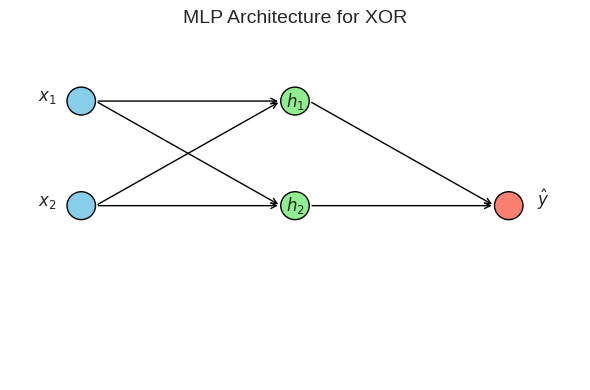

In [42]:
mlp = MLP_XOR()
mlp.show()

In [43]:

X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

mlp_xor = MLP_XOR()
mlp_xor.train(X_xor, y_xor)

Epoch 0 Loss: 0.3274
Epoch 1000 Loss: 0.2498
Epoch 2000 Loss: 0.2479
Epoch 3000 Loss: 0.2306
Epoch 4000 Loss: 0.1784
Epoch 5000 Loss: 0.0817
Epoch 6000 Loss: 0.0219
Epoch 7000 Loss: 0.0104
Epoch 8000 Loss: 0.0065
Epoch 9000 Loss: 0.0046


In [44]:
predictions = mlp_xor.predict(X_xor)

print("\n--- MLP for XOR Results ---")
print(f"Expected Output: {y_xor}")
print(f"MLP Final Output: {predictions.flatten()}")
accuracy = np.sum(y_xor == predictions.flatten()) / len(y_xor)
print(f"Accuracy: {accuracy * 100}%")
print("\nSuccess! The MLP with a hidden layer correctly learns the XOR function.")


--- MLP for XOR Results ---
Expected Output: [0 1 1 0]
MLP Final Output: [0 1 1 0]
Accuracy: 100.0%

Success! The MLP with a hidden layer correctly learns the XOR function.


## 3. Simple Neural Network for MNIST from Scratch

Now, we'll scale up to a more complex problem: classifying handwritten digits from the MNIST dataset. We will build everything from scratch.

- **Architecture**: Input Layer (784 neurons) -> Hidden Layer (128 neurons, ReLU activation) -> Output Layer (10 neurons, Softmax activation)
- **Loss Function**: Categorical Cross-Entropy
- **Optimizer**: Stochastic Gradient Descent (SGD)

**Note**: We use `torchvision` for convenience to download and load the dataset, but all network logic is pure NumPy.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
import torchvision.transforms as transforms
from tqdm import tqdm

In [46]:
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)
len(train_data), len(test_data)

(60000, 10000)

In [18]:
# convert to numpy
# flatten the images
# normalize the data
print(train_data.data.numpy().shape)

X_train = train_data.data.numpy().reshape(len(train_data), -1) / 255.0
y_train_raw = train_data.targets.numpy()

X_test = test_data.data.numpy().reshape(len(test_data), -1) / 255.0
y_test_raw = test_data.targets.numpy()

X_train.shape

(60000, 28, 28)


(60000, 784)

In [19]:
# One-hot encode labels
def one_hot(y, num_classes):
    return np.eye(num_classes)[y]

In [47]:
# demonstrating one-hot
label = 7
batch_of_labels = np.array([3, 0, 9, 1])
num_classes = 10

one_hot_label = one_hot(label, num_classes)
one_hot_batch = one_hot(batch_of_labels, num_classes)

print(f"Original label: {label}")
print(f"One-hot vector: {one_hot_label}\n")

print(f"Original batch: {batch_of_labels}")
print(f"One-hot batch:\n{one_hot_batch}")

Original label: 7
One-hot vector: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

Original batch: [3 0 9 1]
One-hot batch:
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [21]:
y_train = one_hot(y_train_raw, 10)
y_test = one_hot(y_test_raw, 10)

y_train[:2, :], y_test[:2, :]

(array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]]))

In [22]:

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")

Training data shape: (60000, 784)
Training labels shape: (60000, 10)


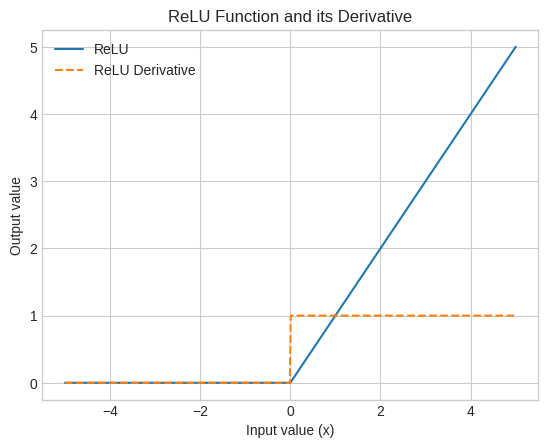

In [48]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

y_relu = relu(x_vals)
y_relu_deriv = relu_derivative(x_vals)

plt.plot(x_vals, y_relu, label='ReLU')
plt.plot(x_vals, y_relu_deriv, label='ReLU Derivative', linestyle='--')
plt.title('ReLU Function and its Derivative')
plt.xlabel('Input value (x)')
plt.ylabel('Output value')
plt.legend()


Original Logits: [ 2.   1.   0.1  3.  -1. ]
Probabilities after Softmax: [[0.233 0.086 0.035 0.634 0.012]]
Sum of probabilities: 1.00
Softmax Function: Converts raw scores (logits) into a probability distribution. The class with the highest logit gets the highest probability.


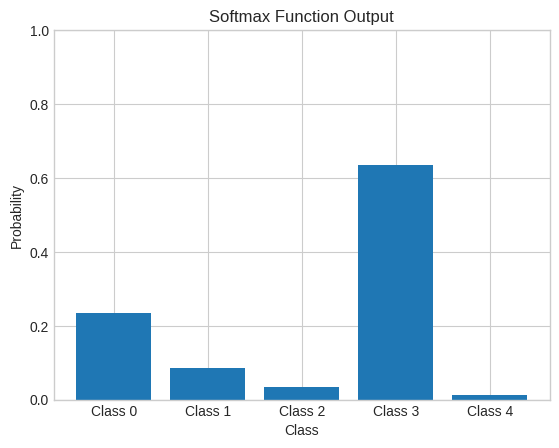

In [49]:
def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True)) # difference for stability
    return exps / np.sum(exps, axis=1, keepdims=True)

# extra bracket for batch dimension
logits = np.array([[2.0, 1.0, 0.1, 3.0, -1.0]]) 

probabilities = softmax(logits)

# flatten to plot
probabilities_flatten = probabilities.flatten()

print(f"Original Logits: {logits.flatten()}")
print(f"Probabilities after Softmax: {np.round(probabilities, 3)}")
print(f"Sum of probabilities: {np.sum(probabilities):.2f}")

class_indices = [f'Class {i}' for i in range(len(probabilities_flatten))]
plt.bar(class_indices, probabilities_flatten)
plt.title('Softmax Function Output')
plt.xlabel('Class')
plt.ylabel('Probability')
plt.ylim(0, 1)
print("Softmax Function: Converts raw scores (logits) into a probability distribution. The class with the highest logit gets the highest probability.")


--- Predictions and Losses for 3 Cases ---

--- Case A ---
Prediction Vector (y_pred): [0.0167 0.0167 0.95   0.0167]
Corresponding Loss: 0.0513

--- Case B ---
Prediction Vector (y_pred): [0.1667 0.1667 0.5    0.1667]
Corresponding Loss: 0.6931

--- Case C ---
Prediction Vector (y_pred): [0.3167 0.3167 0.05   0.3167]
Corresponding Loss: 2.9957



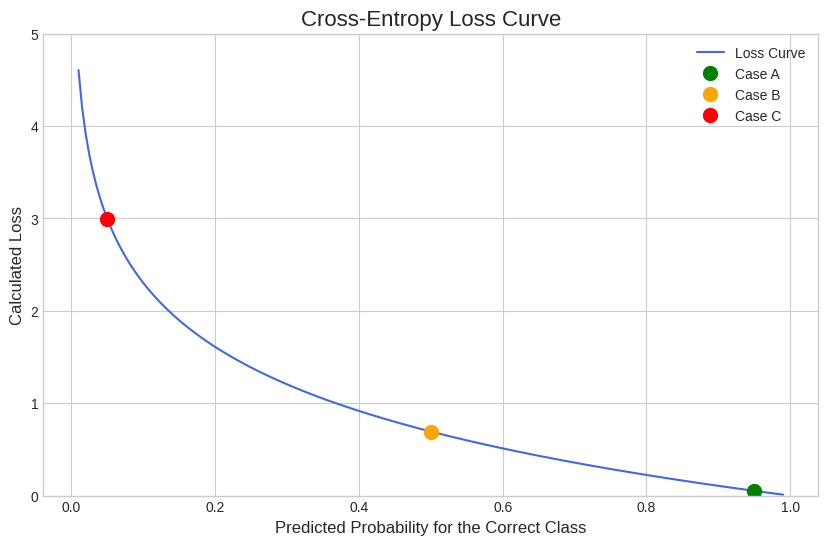

In [50]:
# penalty should grow exponentially as the model gets more confident and wrong
def cross_entropy_loss(y_pred, y_true):
    # y_true contains labels for entire batch 
    # Clip to avoid log(0)
    y_pred_clipped = np.clip(y_pred, 1e-12, 1. - 1e-12)

    # so divided by batch size for averaging loss per sample
    # y_true is either 0 or 1, one_hot
    return -np.sum(y_true * np.log(y_pred_clipped)) / y_true.shape[0]


y_true = np.array([[0, 0, 1, 0]])

predicted_probs_for_correct_class = np.linspace(0.01, 0.99, 200)

# basic curve
losses_curve = [-np.log(p) for p in predicted_probs_for_correct_class]

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(predicted_probs_for_correct_class, losses_curve, color='royalblue', label='Loss Curve')

# 3 Key Cases 
cases = {
    'A': 0.95, # High Confidence, Correct
    'B': 0.50, # Medium Confidence
    'C': 0.05  # Low Confidence, Wrong
}

colors = {'A': 'green', 'B': 'orange', 'C': 'red'}
print("--- Predictions and Losses for 3 Cases ---\n")

for case, prob in cases.items():
    remaining_prob = (1 - prob) / 3

    # sharing same for the rest of the 3 classes
    y_pred = np.array([remaining_prob, remaining_prob, prob, remaining_prob])
    loss = cross_entropy_loss(y_pred.reshape(1, -1), y_true)

    print(f"--- Case {case} ---")
    print(f"Prediction Vector (y_pred): {np.round(y_pred, 4)}")
    print(f"Corresponding Loss: {loss:.4f}\n")

    # Marking the points
    plt.plot(prob, loss, 'o', color=colors[case], markersize=10, label=f'Case {case}')

plt.title('Cross-Entropy Loss Curve', fontsize=16)
plt.xlabel('Predicted Probability for the Correct Class', fontsize=12)
plt.ylabel('Calculated Loss', fontsize=12)
plt.legend()
plt.grid(True)
plt.ylim(0, 5)
plt.show()

### Simple computation graph to understand gradients formula computation

![backprop.png](backprop.png)

Cross entropy backpropagation: https://medium.com/data-science/deriving-backpropagation-with-cross-entropy-loss-d24811edeaf9


In [53]:
class SimpleNN_MNIST:
    def __init__(self, input_size, hidden_size, output_size):
        # He initialization for weights
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
        self.b2 = np.zeros((1, output_size))
        
    def forward(self, X):
        # Store intermediate values for backpropagation
        self.Z1 = X @ self.W1 + self.b1
        self.A1 = relu(self.Z1)
        self.Z2 = self.A1 @ self.W2 + self.b2
        self.A2 = softmax(self.Z2)
        return self.A2
    
    def backward(self, X, y_true):
        # Number of samples in the batch
        m = y_true.shape[0] 
    
        # -----------------------------------
        # Output Layer Gradients
        # -----------------------------------
    
        # Gradient of the loss with respect to Z2 (pre-activation of the output layer)
        # Since we're using Softmax + Cross-Entropy Loss, the gradient simplifies to:
        # dZ2 = A2 - y_true
        # A2 is the output from softmax, y_true is one-hot encoded ground truth
        dZ2 = self.A2 - y_true
    
        # Gradient of the loss with respect to W2 (weights between hidden and output layers)
        # Using the chain rule: dW2 = (A1^T @ dZ2) / m
        # A1: activations from hidden layer, shape (m, hidden_dim)
        # dZ2: error term for output layer, shape (m, output_dim)
        # A1.T @ dZ2 results in shape (hidden_dim, output_dim)
        self.dW2 = (self.A1.T @ dZ2) / m
    
        # Gradient of the loss with respect to b2 (bias of the output layer)
        # Sum over the batch dimension to get bias gradient: shape (1, output_dim)
        self.db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    
        # Backpropagating the error to the hidden layer
        # dA1 = dZ2 @ W2^T
        # W2.T: shape (output_dim, hidden_dim)
        # dZ2: shape (m, output_dim)
        # dA1: shape (m, hidden_dim), error signal for hidden layer outputs (A1)
        dA1 = dZ2 @ self.W2.T
    
        # Applying the derivative of the ReLU activation function
        # ReLU'(Z1) is 1 where Z1 > 0, else 0
        # Element-wise multiply with dA1 to get dZ1 (gradient wrt pre-activation of hidden layer)
        dZ1 = dA1 * relu_derivative(self.Z1)
        self.dW1 = (X.T @ dZ1) / m
        self.db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    def update_params(self, lr):
        # Basic SGD optimizer
        self.W1 -= lr * self.dW1
        self.b1 -= lr * self.db1
        self.W2 -= lr * self.dW2
        self.b2 -= lr * self.db2
        
    def train(self, X_train, y_train, X_test, y_test_raw, epochs, lr, batch_size):
        history = {'loss': [], 'accuracy': []}
        num_batches = len(X_train) // batch_size
        
        for epoch in range(epochs):
            # Shuffle 
            permutation = np.random.permutation(len(X_train))
            X_train_shuffled = X_train[permutation]
            y_train_shuffled = y_train[permutation]
            
            epoch_loss = 0
            for i in tqdm(range(num_batches), desc=f"Epoch {epoch+1}/{epochs}"):
                # Create mini-batch
                start = i * batch_size
                end = start + batch_size
                X_batch = X_train_shuffled[start:end]
                y_batch = y_train_shuffled[start:end]
                
                y_pred = self.forward(X_batch)
                epoch_loss += cross_entropy_loss(y_pred, y_batch)
                self.backward(X_batch, y_batch)
                self.update_params(lr)
            
            # Calculate loss and accuracy at the end of epoch
            avg_loss = epoch_loss / num_batches
            
            # Evaluate on test set
            y_pred_test = self.predict(X_test)
            accuracy = np.sum(y_pred_test == y_test_raw) / len(y_test_raw)
            
            history['loss'].append(avg_loss)
            history['accuracy'].append(accuracy)
            print(f'Epoch {epoch+1} - Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.4f}')
        return history

    def predict(self, X):
        y_pred_probs = self.forward(X)
        return np.argmax(y_pred_probs, axis=1)

Epoch 1/10: 100%|██████████████████████| 937/937 [00:02<00:00, 315.13it/s]


Epoch 1 - Loss: 0.3735, Test Accuracy: 0.9359


Epoch 2/10: 100%|██████████████████████| 937/937 [00:01<00:00, 536.68it/s]


Epoch 2 - Loss: 0.2000, Test Accuracy: 0.9515


Epoch 3/10: 100%|██████████████████████| 937/937 [00:02<00:00, 428.29it/s]


Epoch 3 - Loss: 0.1509, Test Accuracy: 0.9600


Epoch 4/10: 100%|██████████████████████| 937/937 [00:01<00:00, 569.65it/s]


Epoch 4 - Loss: 0.1223, Test Accuracy: 0.9645


Epoch 5/10: 100%|██████████████████████| 937/937 [00:01<00:00, 546.63it/s]


Epoch 5 - Loss: 0.1034, Test Accuracy: 0.9675


Epoch 6/10: 100%|██████████████████████| 937/937 [00:03<00:00, 308.86it/s]


Epoch 6 - Loss: 0.0895, Test Accuracy: 0.9693


Epoch 7/10: 100%|██████████████████████| 937/937 [00:01<00:00, 546.72it/s]


Epoch 7 - Loss: 0.0784, Test Accuracy: 0.9728


Epoch 8/10: 100%|██████████████████████| 937/937 [00:01<00:00, 528.95it/s]


Epoch 8 - Loss: 0.0700, Test Accuracy: 0.9745


Epoch 9/10: 100%|██████████████████████| 937/937 [00:02<00:00, 467.59it/s]


Epoch 9 - Loss: 0.0624, Test Accuracy: 0.9752


Epoch 10/10: 100%|█████████████████████| 937/937 [00:01<00:00, 492.77it/s]


Epoch 10 - Loss: 0.0565, Test Accuracy: 0.9761


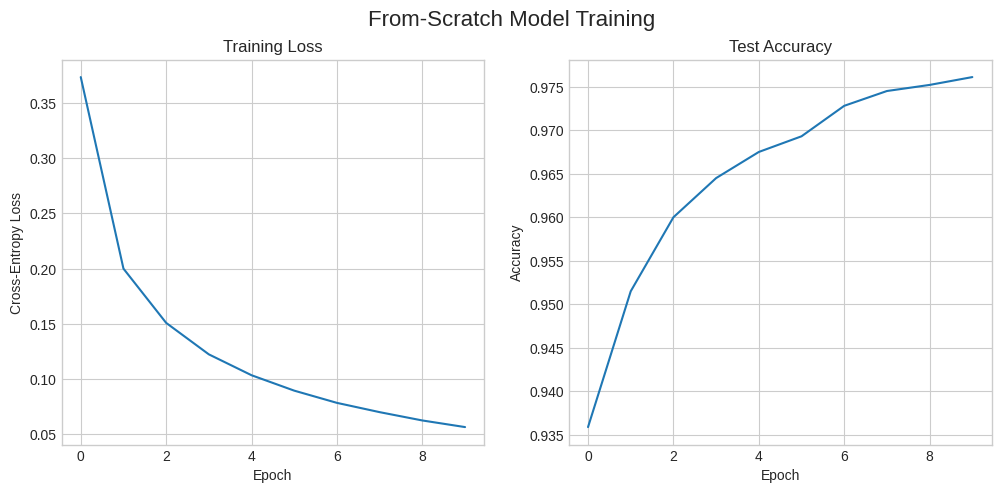

In [54]:
# --- 3. Train the Network and Plot Results ---

# Hyperparameters
INPUT_SIZE = 784
HIDDEN_SIZE = 128
OUTPUT_SIZE = 10
EPOCHS = 10
LEARNING_RATE = 0.1
BATCH_SIZE = 64

scratch_nn = SimpleNN_MNIST(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)
history = scratch_nn.train(X_train, y_train, X_test, y_test_raw, EPOCHS, LEARNING_RATE, BATCH_SIZE)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('From-Scratch Model Training', fontsize=16)

ax1.plot(history['loss'])
ax1.set_title('Training Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Cross-Entropy Loss')

ax2.plot(history['accuracy'])
ax2.set_title('Test Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')

plt.show()

## 4. Weight Initialization Techniques

Proper weight initialization is crucial for preventing gradients from vanishing (becoming too small) or exploding (becoming too large) during training. Here are a few common techniques implemented from scratch.

- **Zeros Initialization**: A bad practice that causes all neurons in a layer to learn the same thing.
- **Random Normal**: Breaks symmetry, but can lead to vanishing/exploding gradients if not scaled correctly.
- **Xavier/Glorot Initialization**: Scales weights based on the number of input neurons (`n_in`). Good for Tanh/Sigmoid activations. Formula: $W \sim N(0, \sqrt{1/n_{in}})$.
- **He Initialization**: Scales weights based on `n_in`. Designed for ReLU-based activations. Formula: $W \sim N(0, \sqrt{2/n_{in}})$.

Random Normal   | Mean:  0.0000, Std:  0.0100
Xavier          | Mean:  0.0000, Std:  0.0358
He              | Mean:  0.0000, Std:  0.0505
Zeros           | Mean:  0.0000, Std:  0.0000


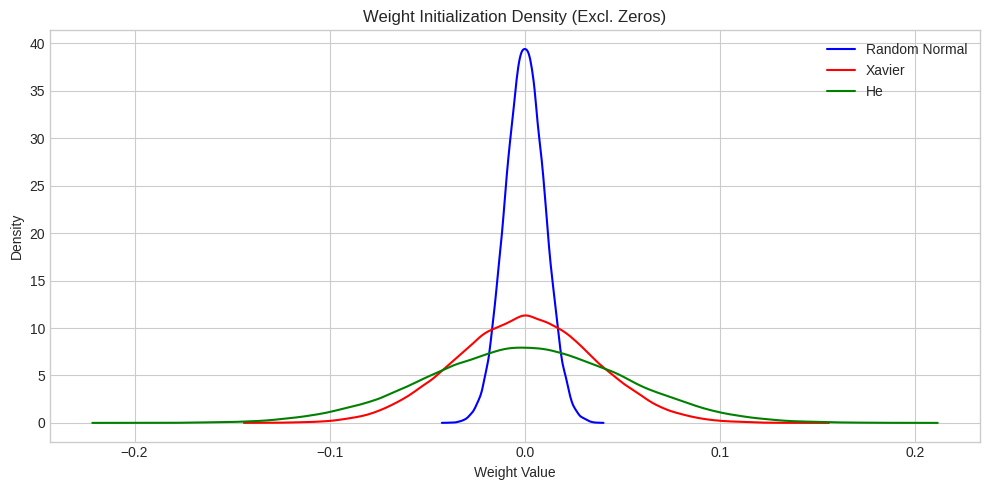

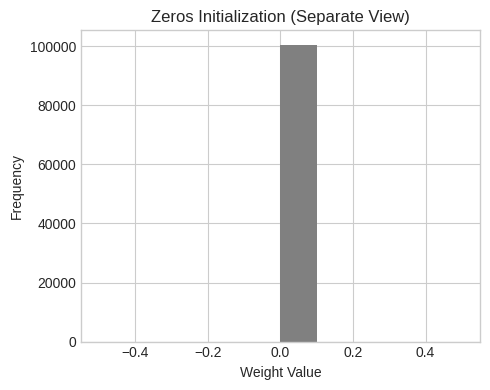

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Initialization 
def zeros_init(n_in, n_out):
    return np.zeros((n_out, n_in))

def random_normal_init(n_in, n_out):
    return np.random.randn(n_out, n_in) * 0.01

def xavier_init(n_in, n_out):
    return np.random.randn(n_out, n_in) * np.sqrt(1.0 / n_in)

def he_init(n_in, n_out):
    return np.random.randn(n_out, n_in) * np.sqrt(2.0 / n_in)

# plot density curves 
def plot_density(weights, label, color):
    flat_weights = weights.flatten()
    density = gaussian_kde(flat_weights)
    x_vals = np.linspace(flat_weights.min(), flat_weights.max(), 200)
    plt.plot(x_vals, density(x_vals), label=label, color=color)

# Layer dimensions
n_in, n_out = 784, 128

initializations = {
    "Random Normal": (random_normal_init(n_in, n_out), 'blue'),
    "Xavier": (xavier_init(n_in, n_out), 'red'),
    "He": (he_init(n_in, n_out), 'green'),
    "Zeros": (zeros_init(n_in, n_out), 'black')  
}

# Print stats and plot densities (excluding Zeros)
plt.figure(figsize=(10, 5))
for name, (weights, color) in initializations.items():
    mean, std = weights.mean(), weights.std()
    print(f"{name:<15} | Mean: {mean:>7.4f}, Std: {std:>7.4f}")
    if name != "Zeros":
        plot_density(weights, name, color)

plt.title("Weight Initialization Density (Excl. Zeros)")
plt.xlabel("Weight Value")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Zeros separately
plt.figure(figsize=(5, 4))
plt.hist(initializations["Zeros"][0].flatten(), bins=10, color='gray')
plt.title("Zeros Initialization (Separate View)")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


## 5. PyTorch Verification

Let's build the exact same network in PyTorch. This helps verify that our from-scratch implementation is correct. We will use the same architecture, hyperparameters, and optimizer.

The final accuracy should be very close to our NumPy model.

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train_raw, dtype=torch.long) 
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test_raw, dtype=torch.long)

train_dataset = TensorDataset(X_train_t, y_train_t)
test_dataset = TensorDataset(X_test_t, y_test_t)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

class PyTorchNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(PyTorchNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        
        # Apply He initialization
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='relu')

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out 


pytorch_nn = PyTorchNN(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)
criterion = nn.CrossEntropyLoss() 
optimizer = optim.SGD(pytorch_nn.parameters(), lr=LEARNING_RATE)

pytorch_history = {'loss': [], 'accuracy': []}

for epoch in range(EPOCHS):
    epoch_loss = 0
    for i, (inputs, labels) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}")):
        outputs = pytorch_nn(inputs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = pytorch_nn(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_loss = epoch_loss / len(train_loader)
    accuracy = correct / total
    
    pytorch_history['loss'].append(avg_loss)
    pytorch_history['accuracy'].append(accuracy)
    print(f'Epoch {epoch+1} - Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')

Epoch 1/10: 100%|█████████████████████| 938/938 [00:00<00:00, 1080.91it/s]


Epoch 1 - Loss: 0.3656, Accuracy: 0.9382


Epoch 2/10: 100%|█████████████████████| 938/938 [00:00<00:00, 1130.23it/s]


Epoch 2 - Loss: 0.1950, Accuracy: 0.9547


Epoch 3/10: 100%|█████████████████████| 938/938 [00:00<00:00, 1095.94it/s]


Epoch 3 - Loss: 0.1472, Accuracy: 0.9615


Epoch 4/10: 100%|██████████████████████| 938/938 [00:00<00:00, 996.78it/s]


Epoch 4 - Loss: 0.1205, Accuracy: 0.9628


Epoch 5/10: 100%|██████████████████████| 938/938 [00:01<00:00, 853.66it/s]


Epoch 5 - Loss: 0.1021, Accuracy: 0.9704


Epoch 6/10: 100%|██████████████████████| 938/938 [00:01<00:00, 857.51it/s]


Epoch 6 - Loss: 0.0882, Accuracy: 0.9725


Epoch 7/10: 100%|██████████████████████| 938/938 [00:00<00:00, 979.19it/s]


Epoch 7 - Loss: 0.0776, Accuracy: 0.9717


Epoch 8/10: 100%|██████████████████████| 938/938 [00:01<00:00, 842.42it/s]


Epoch 8 - Loss: 0.0690, Accuracy: 0.9751


Epoch 9/10: 100%|█████████████████████| 938/938 [00:00<00:00, 1029.96it/s]


Epoch 9 - Loss: 0.0624, Accuracy: 0.9755


Epoch 10/10: 100%|█████████████████████| 938/938 [00:00<00:00, 951.11it/s]


Epoch 10 - Loss: 0.0562, Accuracy: 0.9775


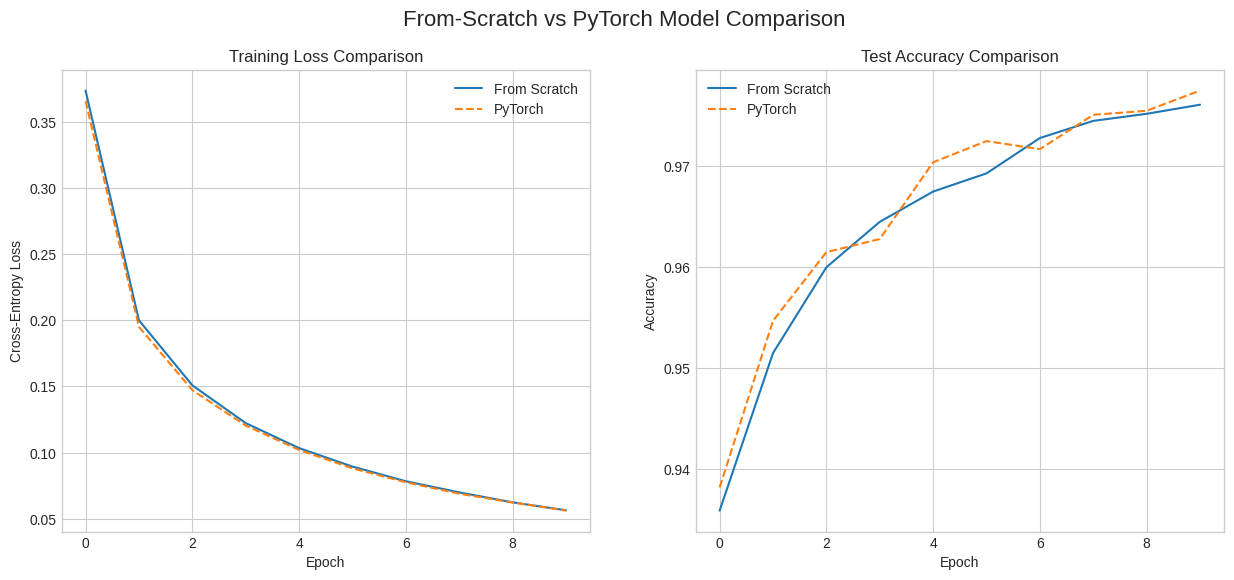

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('From-Scratch vs PyTorch Model Comparison', fontsize=16)

ax1.plot(history['loss'], label='From Scratch')
ax1.plot(pytorch_history['loss'], label='PyTorch', linestyle='--')
ax1.set_title('Training Loss Comparison')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Cross-Entropy Loss')
ax1.legend()

ax2.plot(history['accuracy'], label='From Scratch')
ax2.plot(pytorch_history['accuracy'], label='PyTorch', linestyle='--')
ax2.set_title('Test Accuracy Comparison')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()
